# a) Importing the libraries

In [33]:
import numpy as np   # importing libraries
import matplotlib.pyplot as plt
import pandas as pd

# b) Importing the dataset

In [34]:
ds = pd.read_csv('database.csv', low_memory=False)   # reading csv file using pandas
ds.head()   # viewing the dataset

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


# c) Clean the dataset 

In [35]:
# Checking of null data
ds.isnull().sum() 

Record ID                0
Agency Code              0
Agency Name              0
Agency Type              0
City                     0
State                    0
Year                     0
Month                    0
Incident                 0
Crime Type               0
Crime Solved             0
Victim Sex               0
Victim Age               0
Victim Race              0
Victim Ethnicity         0
Perpetrator Sex          0
Perpetrator Age          0
Perpetrator Race         0
Perpetrator Ethnicity    0
Relationship             0
Weapon                   0
Victim Count             0
Perpetrator Count        0
Record Source            0
dtype: int64

In [36]:
# Show the clean dataset
ds

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638449,638450,WY01500,Park County,Sheriff,Park,Wyoming,2014,January,1,Murder or Manslaughter,...,Hispanic,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
638450,638451,WY01700,Sheridan County,Sheriff,Sheridan,Wyoming,2014,June,1,Murder or Manslaughter,...,Unknown,Male,57,White,Unknown,Acquaintance,Handgun,0,0,FBI
638451,638452,WY01701,Sheridan,Municipal Police,Sheridan,Wyoming,2014,September,1,Murder or Manslaughter,...,Unknown,Female,22,Asian/Pacific Islander,Unknown,Daughter,Suffocation,0,0,FBI
638452,638453,WY01800,Sublette County,Sheriff,Sublette,Wyoming,2014,December,1,Murder or Manslaughter,...,Not Hispanic,Male,31,White,Not Hispanic,Stranger,Knife,0,1,FBI


# d) Encoding categorical data

In [2]:
from sklearn.compose import ColumnTransformer

In [3]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')

NameError: name 'OneHotEncoder' is not defined

In [37]:
ds.loc[:, ('City', 'Weapon', 'Victim Age')].head()

,City,Weapon,Victim Age
0,Anchorage,Blunt Object,14
1,Anchorage,Strangulation,43
2,Anchorage,Unknown,30
3,Anchorage,Strangulation,43
4,Anchorage,Unknown,30


In [38]:
ds['City'].unique()

array(['Anchorage', 'Juneau', 'Nome', ..., 'Rooks', 'McCone', 'Antelope'],
      dtype=object)

In [39]:
ds['Weapon'].unique()

array(['Blunt Object', 'Strangulation', 'Unknown', 'Rifle', 'Knife',
       'Firearm', 'Shotgun', 'Fall', 'Handgun', 'Drowning', 'Suffocation',
       'Explosives', 'Fire', 'Drugs', 'Gun', 'Poison'], dtype=object)

In [40]:
ds['Victim Age'].unique()

array([ 14,  43,  30,  42,  99,  32,  38,  36,  20,  48,  31,  16,  33,
        27,  21,  60,  40,  18,   8,  25,  24,  46,  23,  22,  45,  26,
        58,  17,  29,  41,  68,  13,  35,  44,  54,  37,  51,  90,  50,
        52,  61,  63,  19,  28,  70,  72,  74,  53,  57,  76,  79,  69,
        34,  66,  55,  67,  65,  47,   1,  49,  62,  75,  56,  59,  78,
        39,  15,   0,  71,  77,   2,   4,  64,  82,  85,   6,   5,   7,
         9,  84,  10,  86,  11,  73,  83, 998,  81,  87,  80,   3,  12,
        94,  93,  92,  89,  97,  88,  91,  95,  98,  96])

# e) Splitting the dataset into the Training set and Test set

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x = ds[['Victim Count']]
y = ds[['Incident']]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(x, y)

In [44]:
X_train.shape

(478840, 1)

In [45]:
X_test.shape

(159614, 1)

In [46]:
y_train.shape

(478840, 1)

In [47]:
y_test.shape

(159614, 1)

# f)Train the Regression model on the Training set

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
reg = LinearRegression()

In [50]:
reg.fit(X_train, y_train)

LinearRegression()

# g) Predicting the Test set results

In [51]:
y_pr = reg.predict(X_test)
print(y_pr)

[[22.88754709]
 [22.88754709]
 [22.88754709]
 ...
 [22.88754709]
 [22.88754709]
 [22.88754709]]


# h) Visualising the Training set results

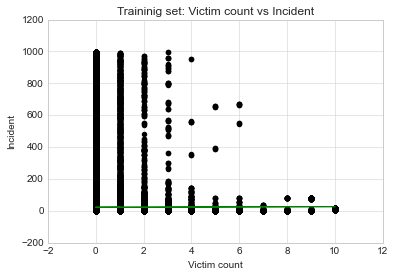

In [53]:
plt.scatter(X_train, y_train, color='black') 
plt.plot(X_train, reg.predict(X_train), color='green' )
plt.title('Traininig set: Victim count vs Incident')
plt.xlabel('Victim count')
plt.ylabel('Incident')
plt.show()

# i) Visualising the Test set results 

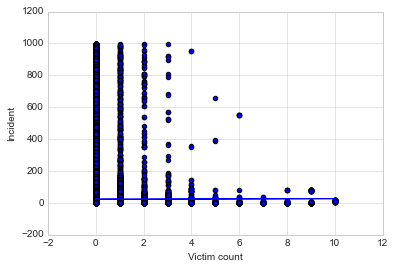

In [54]:
plt.scatter(X_test, y_test) 
plt.plot(X_train, reg.predict(X_train)) 
plt.xlabel('Victim count')
plt.ylabel('Incident')
plt.show()

# j) R2 to determine the correlation between the dependent and independent variables

In [55]:
print('Coefficient of determination (R^2):', r2_score(y_test, y_pr))

Coefficient of determination (R^2): -3.94669526393443e-06


# K) Make future predictions from your dataset 

In [62]:
from sklearn.metrics import r2_score

In [63]:
r2_score(X_test, y_test)

-30555.667443777755